In [1]:
from sklearn import metrics 
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 

import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd

import numpy as np

In [6]:
data_1 = pd.read_csv('TDS_01.csv')

In [23]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18311 entries, 0 to 18310
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   House                           18311 non-null  int64  
 1   Techno                          18311 non-null  int64  
 2   Experimental                    18311 non-null  int64  
 3   Bass                            18311 non-null  int64  
 4   Electronic                      18311 non-null  int64  
 5   Dub                             18311 non-null  int64  
 6   Ambient                         18311 non-null  int64  
 7   Minimal                         18311 non-null  int64  
 8   Club                            18311 non-null  int64  
 9   MicroHouse                      18311 non-null  int64  
 10  Deconstructed                   18311 non-null  int64  
 11  Deep                            18311 non-null  int64  
 12  Dubstep                         

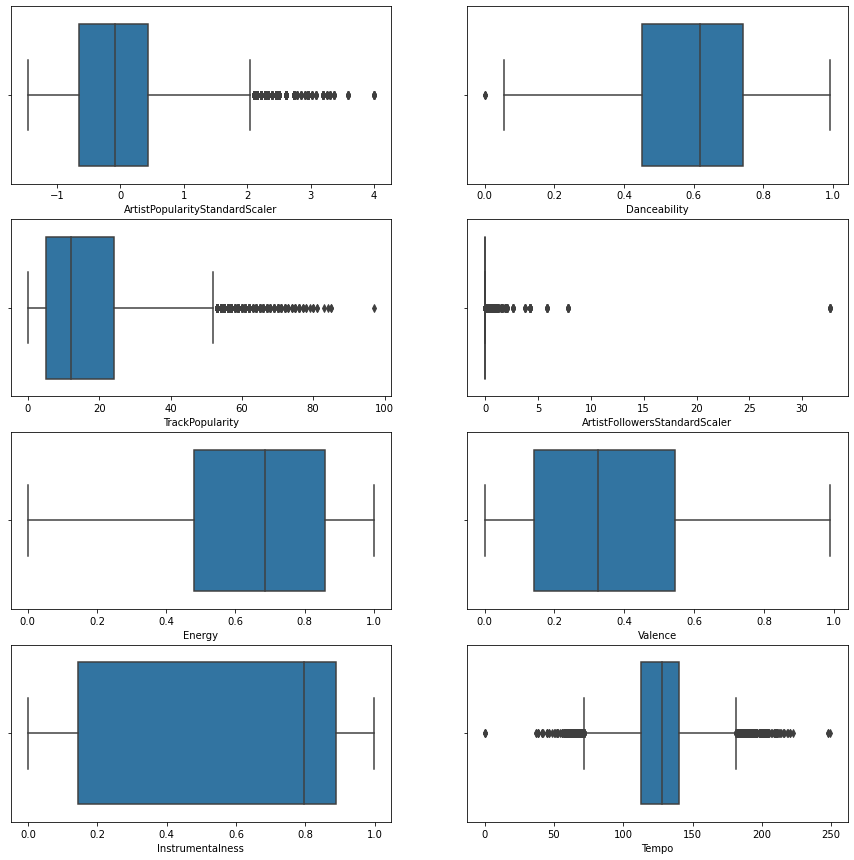

In [11]:
# Electronic, ArtistPopularityStandardScaler, Danceability

test = ['ArtistPopularityStandardScaler'\
        , 'Danceability', 'TrackPopularity'\
        , 'ArtistFollowersStandardScaler', 'Energy'\
       , 'Valence', 'Instrumentalness', 'Tempo']

fig = plt.figure(figsize=(15,15))
axes = 420
for num in test:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = data_1, x = num)
    
plt.show()

In [43]:
data = data_1[['Tempo', 'TrackPopularity', 'Danceability']]

In [44]:
standarazied_data = StandardScaler().fit_transform(data)

In [45]:
# Silhoutte Score

scores = []
inertias = []
values = np.arange(2,14)

In [46]:
# Running an iteration to locate the greater Silhouette Score and number of clusters

for num_clusters in values:
    kmeans = KMeans(n_clusters = num_clusters)
    kmeans.fit(standarazied_data)
    
    score = metrics.silhouette_score(standarazied_data, kmeans.labels_, metric='euclidean', sample_size=len(standarazied_data))
    
    print('\nNumber of Clusters= ', num_clusters)
    print('Silhouette Score= ', score)
    
    scores.append(score)


Number of Clusters=  2
Silhouette Score=  0.31932328517121106

Number of Clusters=  3
Silhouette Score=  0.3157924136337906

Number of Clusters=  4
Silhouette Score=  0.3233859994872628

Number of Clusters=  5
Silhouette Score=  0.27692673505184606

Number of Clusters=  6
Silhouette Score=  0.2760334725361513

Number of Clusters=  7
Silhouette Score=  0.28061788483559974

Number of Clusters=  8
Silhouette Score=  0.28526499932274163

Number of Clusters=  9
Silhouette Score=  0.2885027850412375

Number of Clusters=  10
Silhouette Score=  0.28959072243823325

Number of Clusters=  11
Silhouette Score=  0.2783426422528691

Number of Clusters=  12
Silhouette Score=  0.25792347313023195

Number of Clusters=  13
Silhouette Score=  0.2684591773423581


K-Means


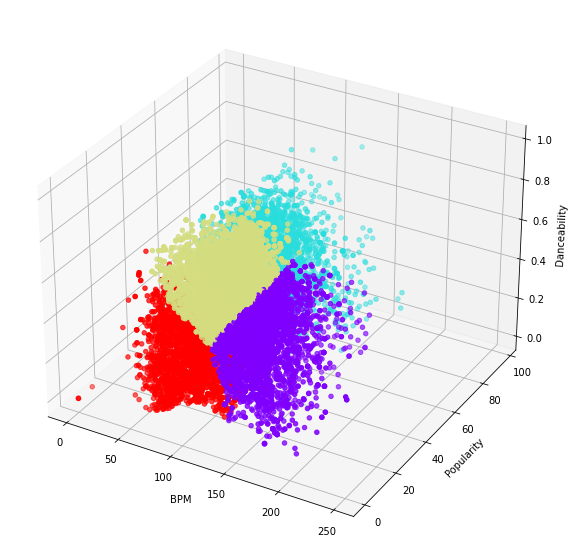

In [47]:
from mpl_toolkits.mplot3d import Axes3D

model = KMeans(n_clusters = 4, random_state = 123)
model.fit(standarazied_data)
kmeans_labels = model.labels_

fig = plt.figure(num = None, figsize=(15, 10), facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')

ax.scatter3D(data['Tempo'], data['TrackPopularity'], data["Danceability"], c=kmeans_labels, cmap='rainbow')

xLabel = ax.set_xlabel('BPM', linespacing=10)
yLabel = ax.set_ylabel('Popularity', linespacing=15)
zLabel = ax.set_zlabel('Danceability', linespacing=20)

print('K-Means')

In [48]:
df_clustered_kmeans = data.assign(Cluster = kmeans_labels)
grouped_kmeans = df_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Tempo,TrackPopularity,Danceability
Cluster,,,
0,160.1,12.1,0.5
1,121.0,39.2,0.6
2,127.1,10.5,0.7
3,96.5,10.2,0.3


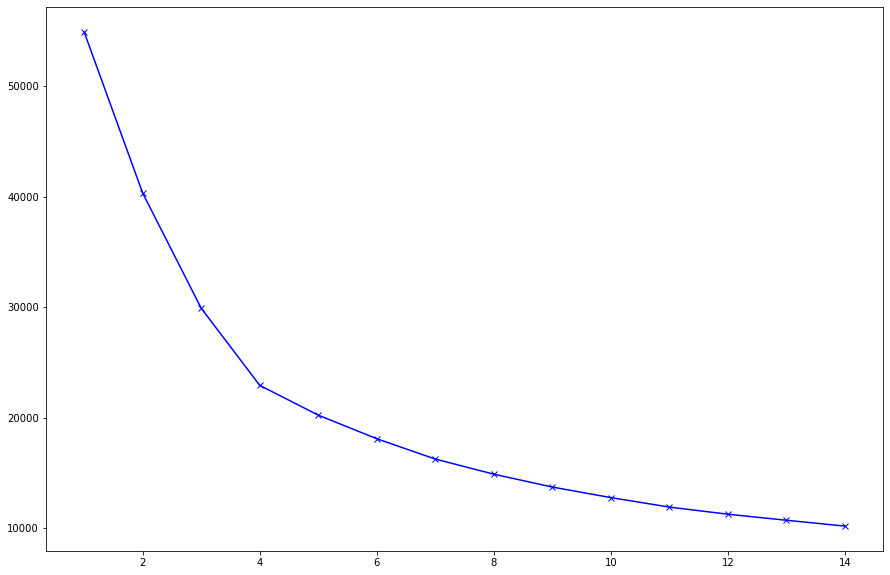

In [49]:
# Elbow Method 

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(standarazied_data)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(15,10))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.show()

In [50]:
data_1['Cluster'] = df_clustered_kmeans['Cluster']

In [51]:
data_1.head() 

,House,Techno,Experimental,Bass,Electronic,Dub,Ambient,Minimal,Club,MicroHouse,...,ArtistPopularityStandardScaler,Danceability,Energy,LoudnessdB,Instrumentalness,Valence,Tempo,ts,TSStandardScaler,Cluster
0,0,1,0,0,0,0,0,1,0,0,...,0.668843,0.793,0.608,-11.638,0.861,0.118,124.988,1232928000,-0.808769,1
1,0,1,0,0,0,0,0,1,0,0,...,0.668843,0.827,0.530,-11.348,0.789,0.761,126.003,1209686400,-0.893491,2
2,0,1,0,0,0,0,0,1,0,0,...,0.668843,0.910,0.460,-10.307,0.802,0.268,126.995,1160092800,-1.074274,2
3,0,1,0,0,0,0,0,1,0,0,...,0.668843,0.839,0.561,-14.322,0.845,0.597,127.996,1232928000,-0.808769,2
4,0,0,0,0,0,1,0,1,0,0,...,0.152431,0.818,0.549,-10.481,0.869,0.416,130.009,1405382400,-0.180123,1


In [54]:
to_spot = data_1[['SpotifyTrackID', 'TrackPopularity', 'Cluster']]

In [56]:
to_spot.loc[to_spot['Cluster'] == 1 ].nlargest(25, 'TrackPopularity')

,SpotifyTrackID,TrackPopularity,Cluster
1216,6PQ88X9TkUIAUIZJHW2upE,97,1
1217,0tgVpDi06FyKpA1z0VMD4v,85,1
1218,7qiZfU4dY1lWllzX7mPBI3,85,1
1219,44V6EzbUSYgyfsNiP0FrlA,84,1
1370,0ofHAoxe9vBkTCp2UQIavz,83,1
1226,31AOj9sFz2gM0O3hMARRBx,81,1
1276,6dGnYIeXmHdcikdzNNDMm2,81,1
1222,0E4Y1XIbs8GrAT1YqVy6dq,80,1
1223,2RttW7RAu5nOAfq6YFvApB,80,1
1371,5e9TFTbltYBg2xThimr0rU,80,1
